#Heart Attack Prediction using Machine learning
Name :- Mohit Sharma <br>
Roll Number:- 20101B0042

## Problem definition: To predict whether the patients does come heart attack or not

### Features:
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

## Data Exploration:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes=True)

In [9]:
data = pd.read_csv("/content/heart.csv")
o2_saturation = pd.read_csv("/content/o2Saturation.csv")

In [10]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 0, 'Age')

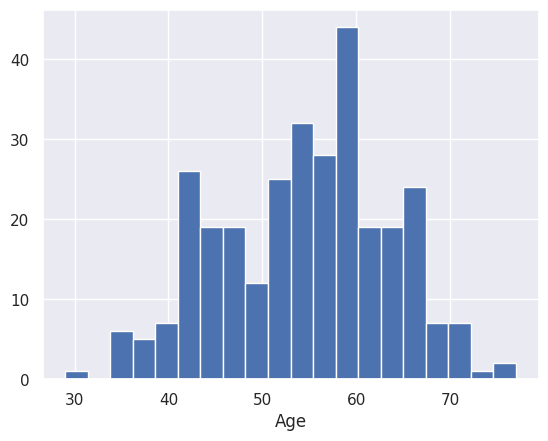

In [13]:
# Let's see the distribution of age column
data["age"].hist(bins=20)
plt.xlabel("Age")

<Figure size 800x800 with 0 Axes>

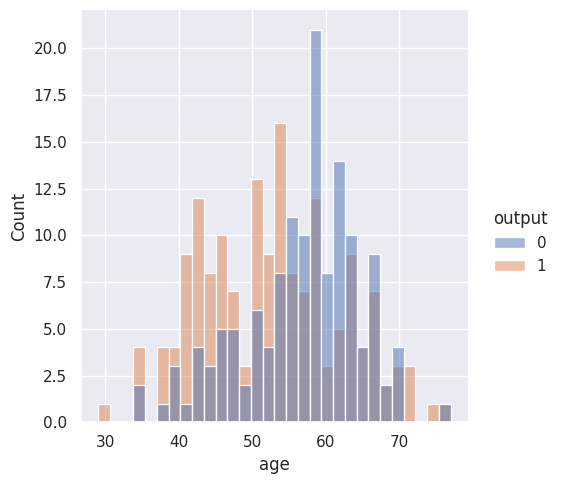

In [14]:
# Let's visualize the same distribution in seaborn
plt.figure(figsize=(8, 8))
sns.displot(x="age", data=data, hue="output", bins=30, color="BlGr")

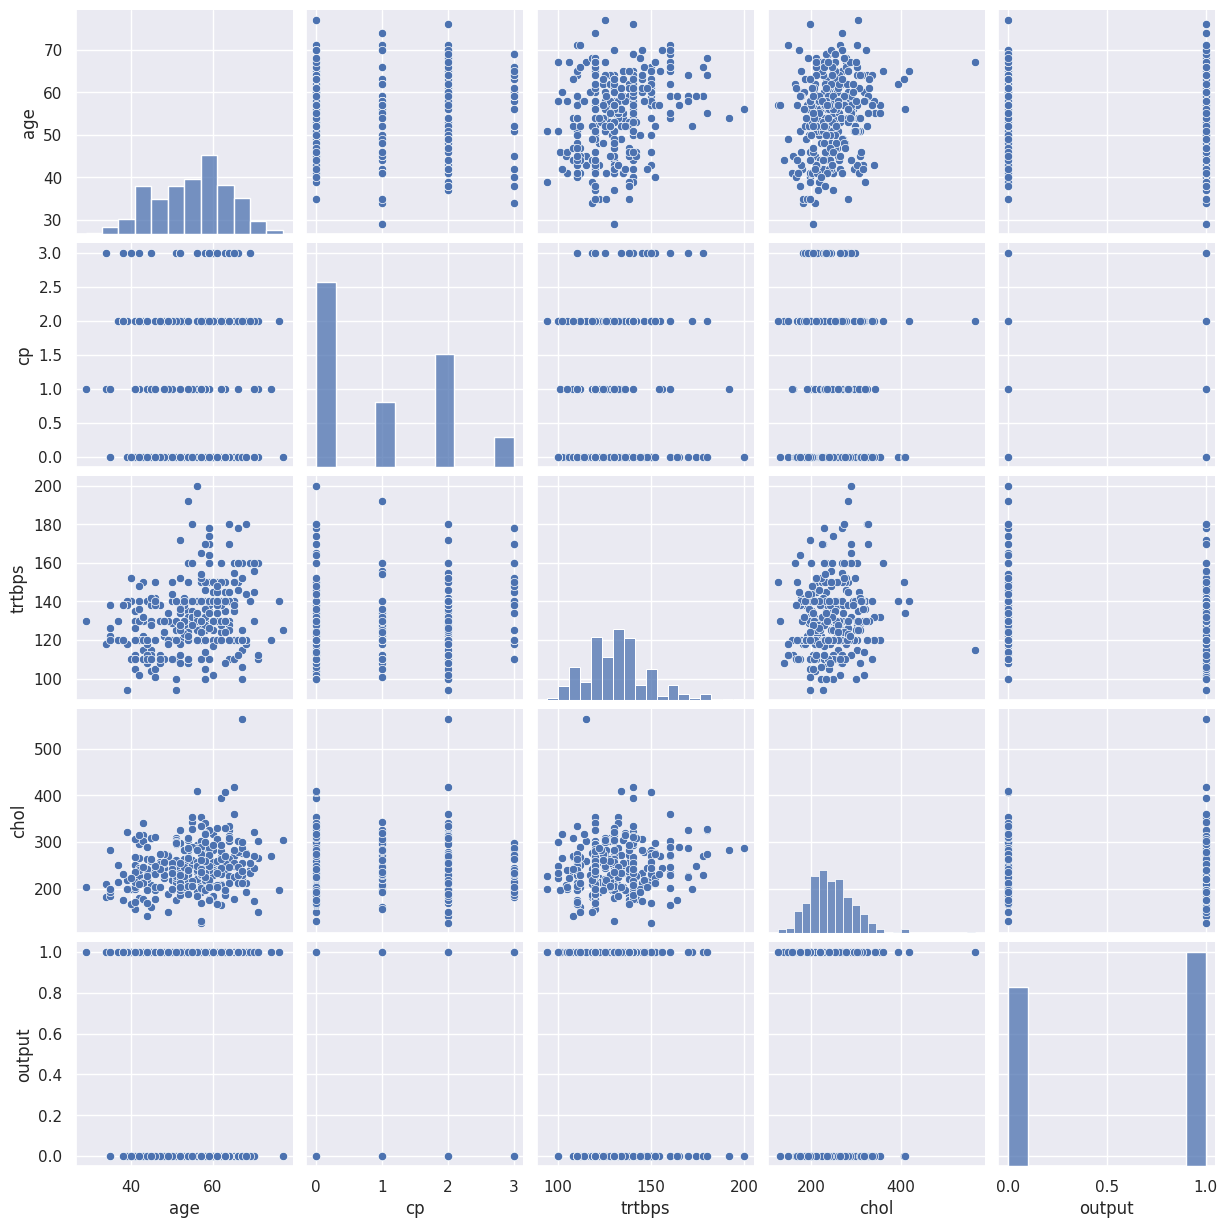

In [15]:
sns.pairplot(data[["age", "cp", "trtbps", 'chol', 'output']])

In [16]:
o2_saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [17]:
data["o2Saturation"] = o2_saturation["98.6"]
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


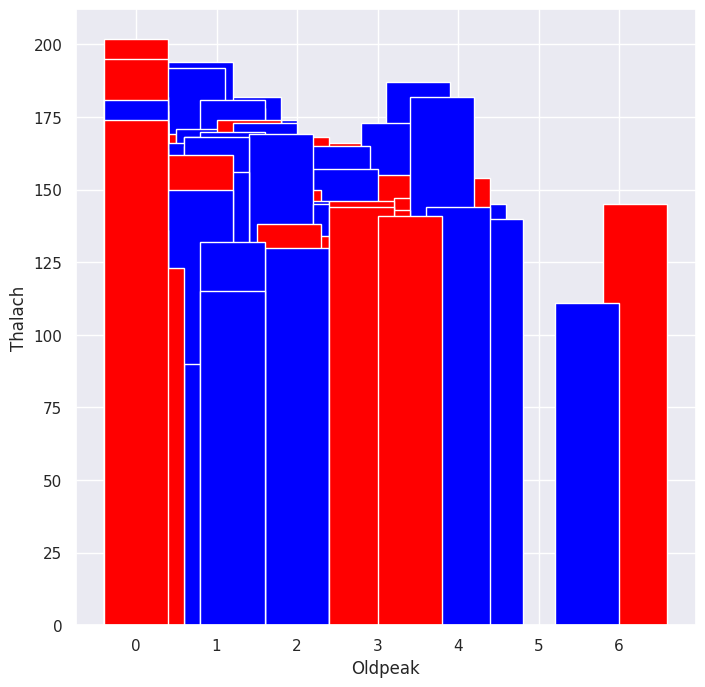

In [18]:
plt.figure(figsize=(8, 8))
plt.bar(data.oldpeak, data.thalachh, color=["red", "blue"]);
plt.xlabel("Oldpeak");
plt.ylabel("Thalach");

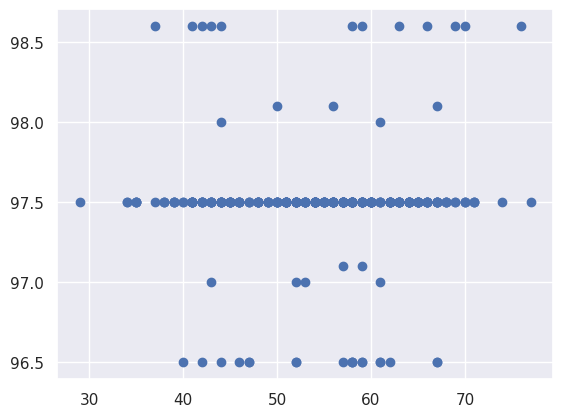

In [19]:
plt.scatter(data["age"], data["o2Saturation"])

In [20]:
corr = data.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.019479
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.133972
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,0.136100
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.045749
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,-0.030027
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,-0.054655
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,0.070147
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,0.149697
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,-0.081410
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.017763


<Axes: >

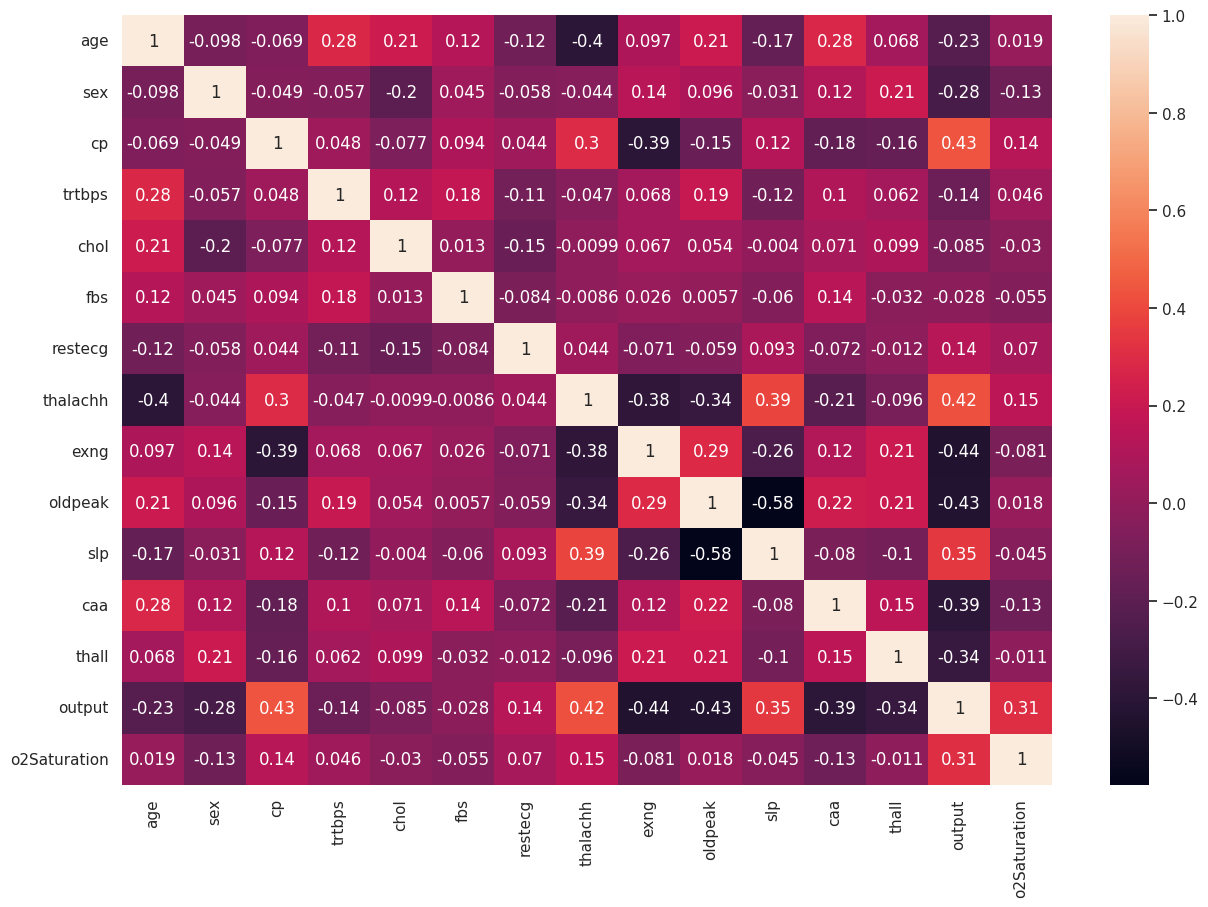

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            annot=True)

Now, we can see in the heat map that the o2Saturation, thalach anf the cp columns are good correlated with the output we are going to predict

## Buliding the Model

In [22]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop("output", axis=1),
                                                    data["output"],
                                                    test_size=0.3)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 14), (91, 14), (212,), (91,))

## Random Forest Classifier

In [24]:
# We have our data ready. Let's train the model
from sklearn.ensemble import RandomForestClassifier

In [25]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7582417582417582

We have a accuracy of 83%. Let's predict and evaluate the output

In [26]:
forest_preds = forest.predict(X_test)
forest_preds

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1])

[[31 13]
 [ 9 38]]


Text(0.5, 1.0, 'Confusion Matrix')

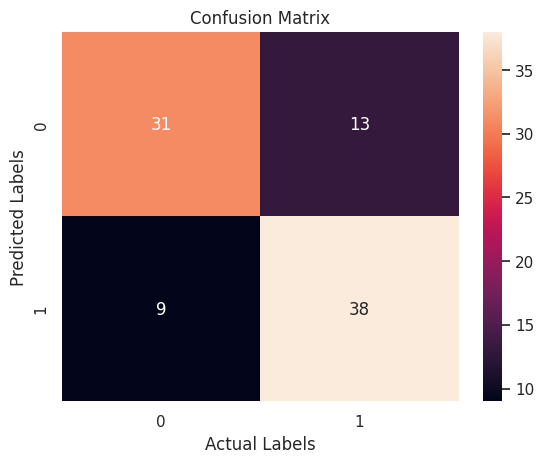

In [27]:
# Evaluate the prediced labels with the original labels
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, forest_preds))
sns.heatmap(confusion_matrix(y_test, forest_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [28]:
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        44
           1       0.75      0.81      0.78        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



### Using RandomizedSearchCV for hyperparameter turning

In [29]:
from sklearn.model_selection import RandomizedSearchCV

estimator = RandomForestClassifier()
param_dists = {"n_estimators": [80, 90, 100, 110, 120],
               "max_depth": [5, 10, 15],
               "max_features" : ["auto", "sqrt", "log2"],
               "min_samples_split": [2, 1, 3, 4],
               "min_samples_leaf": [1, 2, 3, 4]}

randomized_model = RandomizedSearchCV(estimator=estimator,
                                      param_distributions=param_dists,
                                      verbose=True,
                                      n_iter=10,
                                      n_jobs=-1,
                                      cv=5)

In [30]:
# Let's fit the model with our Randomized Model
randomized_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 1, 3, 4],
                                        'n_estimators': [80, 90, 100, 110,
                                                         120]},
                   verbose=True)

In [31]:
randomized_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [32]:
randomized_model.score(X_test, y_test)

0.7912087912087912

Yes!! I got a few improvement in the RandomForestClassifier Model. Let's evaluate the predictions on X_test data

In [33]:
randomized_preds = randomized_model.predict(X_test)
randomized_preds

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1])

[[31 13]
 [ 9 38]]


Text(0.5, 1.0, 'Confusion Matrix')

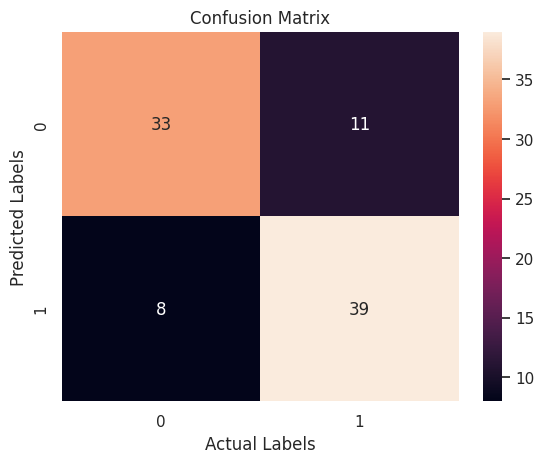

In [34]:
print(confusion_matrix(y_test, forest_preds))
sns.heatmap(confusion_matrix(y_test, randomized_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [35]:
print(classification_report(y_test, randomized_preds))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        44
           1       0.78      0.83      0.80        47

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=90)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8131868131868132

In [37]:
log_reg_preds = log_reg.predict(X_test)
log_reg_preds

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1])

[[32 12]
 [ 5 42]]


Text(0.5, 1.0, 'Confusion Matrix')

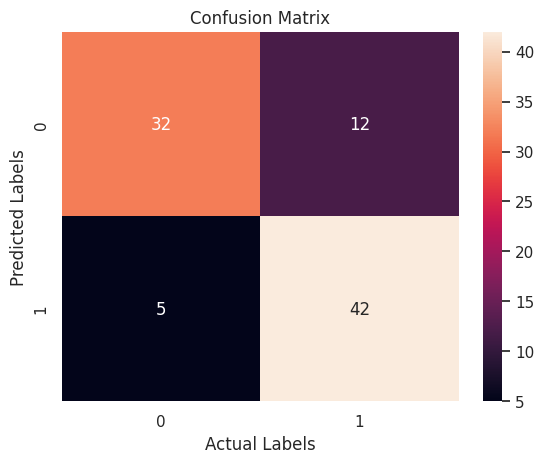

In [38]:
# Evaluate the prediced labels with the original labels
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, log_reg_preds))
sns.heatmap(confusion_matrix(y_test, log_reg_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [39]:
print(classification_report(y_test, log_reg_preds))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



### Let's improve our Logistic Regression Model using the GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

estimator = LogisticRegression()
params_grid = {"penalty": ['l1', 'l2', 'elasticnet'],
               "multi_class": ['auto', 'ovr', 'multinomial'],
               "max_iter": [100, 120, 80],
               "solver": ['newton-cg', 'lbfgs', 'liblinear']}

grid_model = GridSearchCV(estimator= estimator,
                          param_grid= params_grid,
                          verbose=True,
                          cv= 5,
                          n_jobs= -1)

In [41]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
255 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 120, 80],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=True)

In [42]:
grid_model.best_params_

{'max_iter': 100,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [43]:
grid_model.score(X_train, y_train)

0.8820754716981132

Ohh!! We got an improvement using the gridsearchCv

In [44]:
grid_preds = grid_model.predict(X_test)
grid_preds

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1])

[[32 12]
 [ 5 42]]


Text(0.5, 1.0, 'Confusion Matrix')

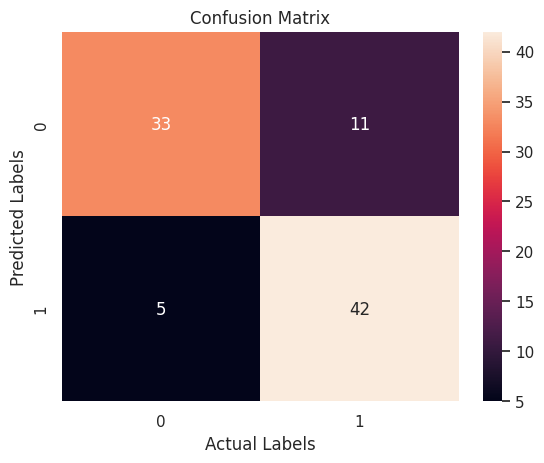

In [45]:
print(confusion_matrix(y_test, log_reg_preds))
sns.heatmap(confusion_matrix(y_test, grid_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [46]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



We have better predictions when we go with the Logistic regression

## Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.7032967032967034

In [48]:
dtree_preds = dtree.predict(X_test)
dtree_preds

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1])

[[26 18]
 [ 9 38]]


Text(0.5, 1.0, 'Confusion Matrix')

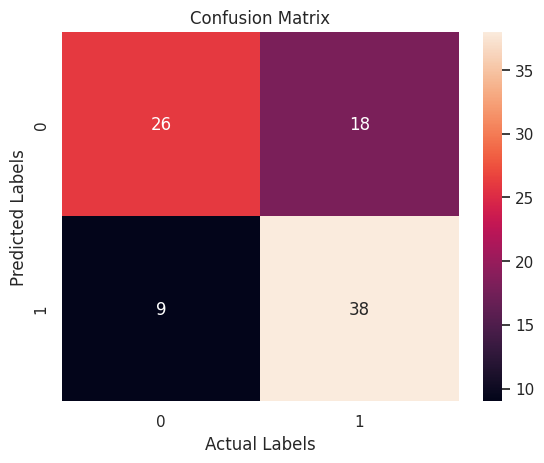

In [49]:
# Evaluate the prediced labels with the original labels
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, dtree_preds))
sns.heatmap(confusion_matrix(y_test, dtree_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [50]:
print(classification_report(y_test, dtree_preds))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66        44
           1       0.68      0.81      0.74        47

    accuracy                           0.70        91
   macro avg       0.71      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



Decsion Tree Classifier is predicting the labels at the worst rate as compared to other two models. I think we can use the StandardScaler method to scale the data and retrain the model. May be it predicts good 🤔

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaler_train = scaler.fit_transform(X_train)
X_scaler_test = scaler.fit_transform(X_test)

In [52]:
# Now, fit the scaled data to the DecsionTreeClassifier

dtree.fit(X_scaler_train, y_train)
dtree.score(X_scaler_test, y_test)

0.7142857142857143

Infact, we have the slight decrement by using the standardscaler for this data

In [53]:
scaler_preds = dtree.predict(X_scaler_test)
scaler_preds

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1])

[[26 18]
 [ 9 38]]


Text(0.5, 1.0, 'Confusion Matrix')

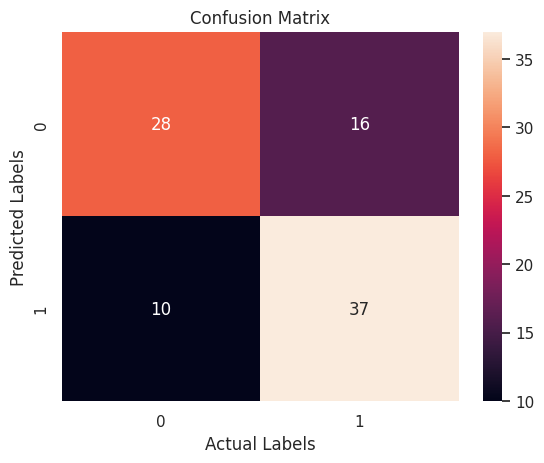

In [54]:
print(confusion_matrix(y_test, dtree_preds))
sns.heatmap(confusion_matrix(y_test, scaler_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [55]:
print(classification_report(y_test, scaler_preds))

              precision    recall  f1-score   support

           0       0.74      0.64      0.68        44
           1       0.70      0.79      0.74        47

    accuracy                           0.71        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



In [56]:
model_scores = {"Forest": forest.score(X_test, y_test),
                "Randomized Forest": randomized_model.score(X_test, y_test),
                "Logistic": log_reg.score(X_test, y_test),
                "Grid Logistic": grid_model.score(X_train, y_train),
                "DTree": dtree.score(X_test, y_test),
                "DTree Scaler": dtree.score(X_scaler_test, y_test)}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [57]:
model_scores

{'Forest': 0.7582417582417582,
 'Randomized Forest': 0.7912087912087912,
 'Logistic': 0.8131868131868132,
 'Grid Logistic': 0.8820754716981132,
 'DTree': 0.45054945054945056,
 'DTree Scaler': 0.7142857142857143}

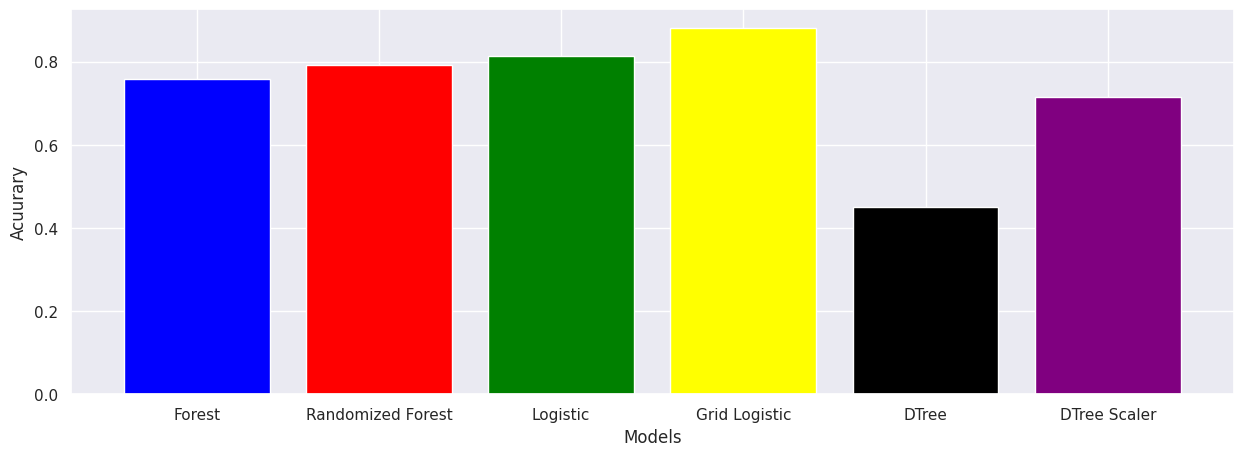

In [58]:
plt.figure(figsize=(15, 5))
plt.bar(*zip(*model_scores.items()), color=["blue", "red", "green", "yellow", "black", "purple"])
plt.xlabel("Models");
plt.ylabel("Acuurary");